# Statistics from Stock Data

In this mini_project we will load stock data into a Pandas Dataframe and calculate some statistics on it. We will be working with stock data from Google, Apple, and Amazon. All the stock data was downloaded from yahoo finance in CSV format.

**Date Open High Low Close Adj_Close Volume**

We will start by reading in any of the above CSV files into a DataFrame and see what the data looks like.

In [52]:
# We import pandas into Python
import pandas as pd

# We read in a stock data data file into a data frame and see what it looks like
gf =pd.read_csv('./GOOG.csv')

# We display the first 5 rows of the DataFrame
gf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


In [53]:
gf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3313 non-null   object 
 1   Open       3313 non-null   float64
 2   High       3313 non-null   float64
 3   Low        3313 non-null   float64
 4   Close      3313 non-null   float64
 5   Adj Close  3313 non-null   float64
 6   Volume     3313 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 181.3+ KB



We will load the stock data from Google, Apple, and Amazon into separte DataFrames. However, for each stock data we are only interested in loading the `Date` and `Adj Close` columns into the Dataframe. In addtion, we want to use the `Date` column as our row index. Finally, we want the DataFrame to recognize the dates as actual dates (year/month/day) and not as strings. For each stock, we can accomplish all theses things in just one line of code by using the appropiate keywords in the `pd.read_csv()` function. The following are a the keywords to be used:

*  The `index_col` keyword to indicate which column you want to use as an index. For example `index_col = ['Open']`

*  The `parse_dates` keyword equal to `True` to convert the Dates into real dates of the form year/month/day

*  The `usecols` keyword to select which columns you want to load into the DataFrame. For example `usecols = ['Open', 'High']`


In [54]:
# We load the Google stock data into a DataFrame
google_stock = pd.read_csv('./GOOG.csv', index_col=['Date'], parse_dates= True, usecols=['Date','Adj Close'])

# We load the Apple stock data into a DataFrame
apple_stock = pd.read_csv('./AAPL.csv', index_col=['Date'], parse_dates= True, usecols=['Date','Adj Close'])
                       
# We load the Amazon stock data into a DataFrame
amazon_stock = pd.read_csv('./AMZN.csv', index_col=['Date'], parse_dates= True, usecols=['Date','Adj Close'])

In [55]:
# We display the google_stock DataFrame
google_stock.head()

,Adj Close
Date,
2004-08-19,49.845802
2004-08-20,53.805050
2004-08-23,54.346527
2004-08-24,52.096165
2004-08-25,52.657513


In [56]:
google_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3313 entries, 2004-08-19 to 2017-10-13
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  3313 non-null   float64
dtypes: float64(1)
memory usage: 51.8 KB


We want to join the three DataFrames above to create a single new DataFrame that contains all the `Adj Close` for all the stocks. We'll start by creating an empty DataFrame that has as row indices calendar days between `2000-01-01`  and `2016-12-31`. We will use the `pd.date_range()` function to create the calendar dates first and then we will create a DataFrame that uses those dates as row indices:

In [57]:
# We create calendar dates between '2000-01-01' and  '2016-12-31'
dates = pd.date_range('2000-01-01', '2016-12-31')

# We create and empty DataFrame that uses the above dates as indices
all_stocks = pd.DataFrame(index = dates)
all_stocks.head()

""
2000-01-01
2000-01-02
2000-01-03
2000-01-04
2000-01-05



 Since all the columns in the individual dataframes have the same name, `Adj Close`, we must change them to the stock name before joining them. 

In [58]:
# Change the Adj Close column label to Google
google_stock = google_stock.rename(columns={'Adj Close':'Google'})

# Change the Adj Close column label to Apple
apple_stock = apple_stock.rename(columns={'Adj Close':'Apple'})

# Change the Adj Close column label to Amazon
amazon_stock = amazon_stock.rename(columns={'Adj Close':'Amazon'}) 

In [59]:
# We display the google_stock DataFrame
google_stock.head()

,Google
Date,
2004-08-19,49.845802
2004-08-20,53.805050
2004-08-23,54.346527
2004-08-24,52.096165
2004-08-25,52.657513


In [60]:
# We display the apple_stock DataFrame
apple_stock.head()

,Apple
Date,
2000-01-03,3.596616
2000-01-04,3.293384
2000-01-05,3.341579
2000-01-06,3.052405
2000-01-07,3.196992


In [61]:
# We display the amazon_stock DataFrame
amazon_stock.head()

,Amazon
Date,
2000-01-03,89.3750
2000-01-04,81.9375
2000-01-05,69.7500
2000-01-06,65.5625
2000-01-07,69.5625


Now that we have unique column labels, we can join the individual DataFrames to the `all_stocks` DataFrame. For this we will use the `dataframe.join()` function. The function `dataframe1.join(dataframe2)` joins `dataframe1` with `dataframe2`. We will join each dataframe one by one to the `all_stocks` dataframe. Fill in the code below to join the dataframes, the first join has been made for you:

In [62]:
# We join the Google stock to all_stocks
all_stocks = all_stocks.join(google_stock)

# We join the Apple stock to all_stocks
all_stocks = all_stocks.join(apple_stock)

# We join the Amazon stock to all_stocks
all_stocks = all_stocks.join(amazon_stock)

In [63]:
# We display the all_stocks DataFrame
all_stocks.head()

,Google,Apple,Amazon
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,NaN,3.596616,89.3750
2000-01-04,NaN,3.293384,81.9375
2000-01-05,NaN,3.341579,69.7500


In [64]:
# Check if there are any NaN values in the all_stocks dataframe
all_stocks.isna().sum()

Google    3095
Apple     1933
Amazon    1933
dtype: int64

In [65]:
# Remove any rows that contain NaN values
all_stocks.dropna(axis=0, inplace= True)

In [66]:
# Check if there are any NaN values in the all_stocks dataframe
all_stocks.isna().sum()

Google    0
Apple     0
Amazon    0
dtype: int64

In [67]:
# We display the all_stocks DataFrame
all_stocks.head()

,Google,Apple,Amazon
2004-08-19,49.845802,1.973460,38.630001
2004-08-20,53.805050,1.979244,39.509998
2004-08-23,54.346527,1.997236,39.450001
2004-08-24,52.096165,2.053144,39.049999
2004-08-25,52.657513,2.123831,40.299999


Now that we have eliminated any *NaN* values we can now calculate some basic statistics on the stock prices.

In [68]:
# Print the average stock price for each stock
print('The average stock price for each stock:\n',all_stocks.mean())
# Print the median stock price for each stock
print('The median price for each stock:\n',all_stocks.median())
# Print the standard deviation of the stock price for each stock  
print('The median price for each stock:\n',all_stocks.std())
# Print the correlation between stocks
print('The median price for each stock:\n',all_stocks.corr())

The average stock price for each stock:
 Google    347.420229
Apple      47.736018
Amazon    216.598177
dtype: float64
The median price for each stock:
 Google    286.397247
Apple      39.461483
Amazon    161.820007
dtype: float64
The median price for each stock:
 Google    187.671596
Apple      37.421555
Amazon    199.129792
dtype: float64
The median price for each stock:
           Google     Apple    Amazon
Google  1.000000  0.900242  0.952444
Apple   0.900242  1.000000  0.886321
Amazon  0.952444  0.886321  1.000000


We will now look at how we can compute some rolling statistics, also known as moving statistics. We can calculate for example the rolling mean (moving average) of the Google stock price by using the Pandas `dataframe.rolling().mean()` method. The `dataframe.rolling(N).mean()` calculates the rolling mean over an `N`-day window. In other words, we can take a look at the average stock price every `N`  days using the above method.

In [95]:
# We compute the rolling mean using a 150-Day window for all stocks
rollingMeanGo = all_stocks['Google'].rolling(150).mean()
rollingMeanAP = all_stocks['Apple'].rolling(150).mean()
rollingMeanAM = all_stocks['Amazon'].rolling(150).mean()




In [93]:
rollingMean.head()

2004-08-19   NaN
2004-08-20   NaN
2004-08-23   NaN
2004-08-24   NaN
2004-08-25   NaN
Name: Amazon, dtype: float64

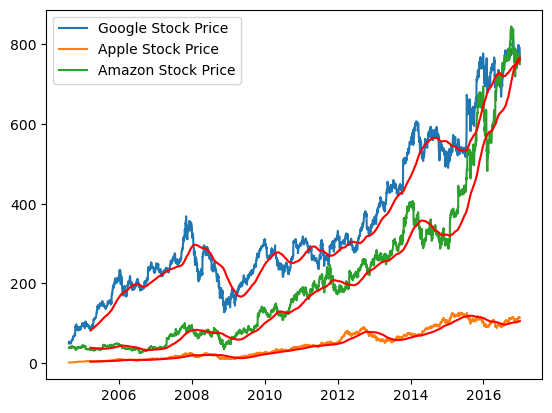

In [94]:
%matplotlib inline

# We import matplotlib into Python
import matplotlib.pyplot as plt

# We plot the Google stock data
plt.plot(all_stocks['Google'])
plt.plot(all_stocks['Apple'])
plt.plot(all_stocks['Amazon'])
# We plot the rolling mean ontop of our Google stock data
plt.plot(rollingMeanGo, color='red')
plt.plot(rollingMeanAP, color='red')
plt.plot(rollingMeanAM, color='red')
plt.legend(['Google Stock Price', 'Apple Stock Price', 'Amazon Stock Price'])
plt.show()

The plot clearly shows that gooogle stock price generally has the highest price.<br> Apple stock price has lowest stock price and with time apple's stock price increases at much lower rate than Google and Amazon stock prices.